# **Cat vs Dog Classification**

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


## **Pre-processing Images**

In [3]:
path = "/content/drive/My Drive/Colab Notebooks/train"
d = 128     # Dimensions after preprocessing

In [ ]:

yLabel = []
xImgPath = []

for img in os.listdir(path):
    # image naming --> cat.15.jpg, dog.6.jpg
    xImgPath.append(os.path.join(path, img))
    yLabel.append(img[:3])
    
data = pd.DataFrame()
data['X'] = xImgPath
data['Y'] = yLabel


In [ ]:
data.head()

,X,Y
0,/content/drive/My Drive/Colab Notebooks/train/...,cat
1,/content/drive/My Drive/Colab Notebooks/train/...,cat
2,/content/drive/My Drive/Colab Notebooks/train/...,cat
3,/content/drive/My Drive/Colab Notebooks/train/...,cat
4,/content/drive/My Drive/Colab Notebooks/train/...,cat


In [ ]:

# splitting data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(
    data,
    test_size = 0.2,
    random_state = 15
)


### **Data Augmentation**
Defining dataset Iterators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_iter = train_datagen.flow_from_dataframe(
    dataframe = data_train,
    x_col = 'X',
    y_col = 'Y',
    target_size = (d, d),
    color_mode = 'grayscale',
    class_mode = "binary",
    batch_size = 1
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_iter = test_datagen.flow_from_dataframe(
      dataframe = data_test,
      x_col = 'X',
      y_col = 'Y',
      target_size = (d, d),
      color_mode = 'grayscale',
      class_mode = "binary",
      batch_size = 1
)

Found 5000 validated image filenames belonging to 2 classes.


### **Training dataset Pre-Processing**


In [ ]:
X_train = []
Y_train = []

count = 0
for x, y in train_iter:
    count += 1
    X_train.append(x[0])
    Y_train.append(y[0])
    
    if count%1000==0:
        print("images read - ", count)
    if count==30000:
       break

images read -  1000
images read -  2000
images read -  3000
images read -  4000
images read -  5000
images read -  6000
images read -  7000
images read -  8000
images read -  9000
images read -  10000
images read -  11000
images read -  12000
images read -  13000
images read -  14000
images read -  15000
images read -  16000
images read -  17000
images read -  18000
images read -  19000
images read -  20000
images read -  21000
images read -  22000
images read -  23000
images read -  24000
images read -  25000
images read -  26000
images read -  27000
images read -  28000
images read -  29000
images read -  30000


In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:

# saving training dataset
pickle.dump(X_train, open('/content/drive/My Drive/Colab Notebooks/catvsdog/X_train_aug.pkl', 'wb'), protocol=4)
pickle.dump(Y_train, open('/content/drive/My Drive/Colab Notebooks/catvsdog/Y_train_aug.pkl', 'wb'), protocol=4)


### **Testing Dataset Pre-Processing**

In [ ]:
X_test = []
Y_test = []

count = 0
for x, y in test_iter:
    count += 1
    X_test.append(x[0])
    Y_test.append(y[0])
    
    if count%1000==0:
        print("images read - ", count)
    if count==7500:
       break

images read -  1000
images read -  2000
images read -  3000
images read -  4000
images read -  5000
images read -  6000
images read -  7000


In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:

# saving testing dataset
pickle.dump(X_test, open('/content/drive/My Drive/Colab Notebooks/catvsdog/X_test_aug.pkl', 'wb'), protocol=4)
pickle.dump(Y_test, open('/content/drive/My Drive/Colab Notebooks/catvsdog/Y_test_aug.pkl', 'wb'), protocol=4)


### **Loading pre-processed dataset**

In [4]:
X_train = pickle.load(open('/content/drive/My Drive/Colab Notebooks/catvsdog/X_train_aug.pkl', 'rb'))
Y_train = pickle.load(open('/content/drive/My Drive/Colab Notebooks/catvsdog/Y_train_aug.pkl', 'rb'))
X_test = pickle.load(open('/content/drive/My Drive/Colab Notebooks/catvsdog/X_test_aug.pkl', 'rb'))
Y_test = pickle.load(open('/content/drive/My Drive/Colab Notebooks/catvsdog/Y_test_aug.pkl', 'rb'))

In [5]:
Y_train = np.reshape(Y_train, (len(Y_train), 1))
Y_test = np.reshape(Y_test, (len(Y_test), 1))

print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_train:  (30000, 128, 128, 1)
Y_train:  (30000, 1)
X_test:  (7500, 128, 128, 1)
Y_test:  (7500, 1)




---


## **Gallery**

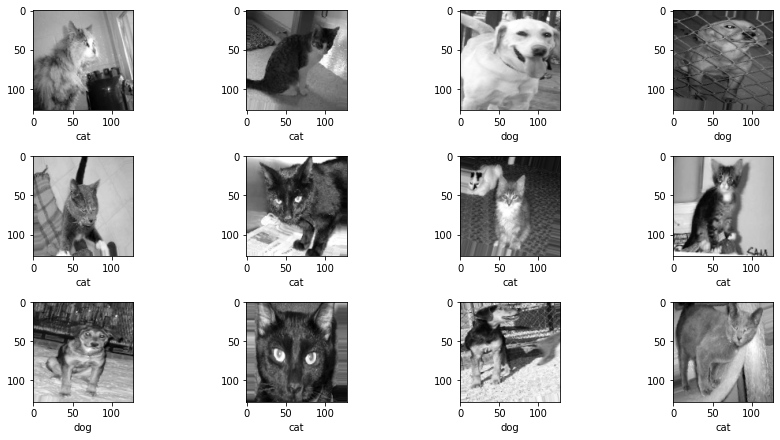

In [6]:
group = ["cat", "dog"]
plt.figure(figsize=(12, 24))
for i in range(12):
    plt.subplot(12, 4, i+1)
    plt.imshow(X_train[i].reshape((d,d)), cmap='gray')
    plt.xlabel(group[int(Y_train[i][0])])
plt.tight_layout()
plt.show()



---


## **CNN Models**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [8]:
def testModel(model, mName):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print("Training:")
    trainedModel = model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

    print("\nTesting:")
    model.evaluate(X_test, Y_test)

    print("")
    model.save('/content/drive/My Drive/Colab Notebooks/catvsdog/'+mName, trainedModel)

    return trainedModel

In [9]:
def plotModel(model):
    plt.figure(figsize=(25, 25))
    for i in range(3):
        plt.subplot(3, 3, i+1)
        plt.plot(model[i].history['accuracy'])
        plt.plot(model[i].history['val_accuracy'])
        plt.title('Model'+str(i+1))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### **Model 1**

2 convolutional layers

In [10]:
model1 = Sequential()

model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())

model1.add(Dense(128, input_shape = X_train.shape[1:], activation = 'relu'))

model1.add(Dense(2, activation = 'softmax'))

In [11]:
m1 = testModel(model1, "model1_2l_aug.h5")

Training:
Epoch 1/20
750/750 [==============================] - 18s 24ms/step - loss: 0.6676 - accuracy: 0.6022 - val_loss: 0.6346 - val_accuracy: 0.6463
Epoch 2/20
750/750 [==============================] - 17s 23ms/step - loss: 0.5915 - accuracy: 0.6869 - val_loss: 0.5740 - val_accuracy: 0.7068
Epoch 3/20
750/750 [==============================] - 18s 23ms/step - loss: 0.4797 - accuracy: 0.7664 - val_loss: 0.5455 - val_accuracy: 0.7228
Epoch 4/20
750/750 [==============================] - 17s 23ms/step - loss: 0.3201 - accuracy: 0.8603 - val_loss: 0.5807 - val_accuracy: 0.7493
Epoch 5/20
750/750 [==============================] - 18s 23ms/step - loss: 0.1277 - accuracy: 0.9531 - val_loss: 0.8254 - val_accuracy: 0.7470
Epoch 6/20
750/750 [==============================] - 18s 23ms/step - loss: 0.0335 - accuracy: 0.9904 - val_loss: 1.1557 - val_accuracy: 0.7503
Epoch 7/20
750/750 [==============================] - 18s 24ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 1.4962 - val

In [22]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

### **Model 2**

3 convolutional layers

dropout - regularization technique (prevent overfitting). During training, ignore some randomly selected neurons.

In [11]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), activation = 'relu'))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(64, (3,3), activation = 'relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.4))

model2.add(Flatten())

model2.add(Dense(128, input_shape = X_train.shape[1:], activation = 'relu'))

model2.add(Dense(2, activation = 'softmax'))

In [13]:
m2 = testModel(model2, "model2_3l_aug.h5")

Training:
Epoch 1/20
750/750 [==============================] - 15s 20ms/step - loss: 0.6582 - accuracy: 0.6036 - val_loss: 0.5815 - val_accuracy: 0.6920
Epoch 2/20
750/750 [==============================] - 14s 18ms/step - loss: 0.5586 - accuracy: 0.7137 - val_loss: 0.5352 - val_accuracy: 0.7227
Epoch 3/20
750/750 [==============================] - 14s 19ms/step - loss: 0.4879 - accuracy: 0.7630 - val_loss: 0.4578 - val_accuracy: 0.7842
Epoch 4/20
750/750 [==============================] - 14s 19ms/step - loss: 0.4435 - accuracy: 0.7894 - val_loss: 0.4537 - val_accuracy: 0.7838
Epoch 5/20
750/750 [==============================] - 14s 19ms/step - loss: 0.4099 - accuracy: 0.8105 - val_loss: 0.4158 - val_accuracy: 0.8015
Epoch 6/20
750/750 [==============================] - 14s 19ms/step - loss: 0.3765 - accuracy: 0.8306 - val_loss: 0.4227 - val_accuracy: 0.8092
Epoch 7/20
750/750 [==============================] - 14s 19ms/step - loss: 0.3418 - accuracy: 0.8458 - val_loss: 0.3978 - val

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)      

### **Model 3**

4 convolutional layers


In [15]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), activation="relu", input_shape=(d,d,1)))
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(64, (3,3), activation="relu"))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3,3), activation="relu"))
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3,3), activation="relu"))
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(256, activation="relu"))
model3.add(Dropout(0.5))

model3.add(Dense(2, activation="softmax"))

In [16]:
m3 = testModel(model3, "model3_4l_aug.h5")

Training:
Epoch 1/20
750/750 [==============================] - 13s 18ms/step - loss: 0.6872 - accuracy: 0.5375 - val_loss: 0.6461 - val_accuracy: 0.6337
Epoch 2/20
750/750 [==============================] - 13s 17ms/step - loss: 0.6137 - accuracy: 0.6710 - val_loss: 0.5756 - val_accuracy: 0.6983
Epoch 3/20
750/750 [==============================] - 13s 17ms/step - loss: 0.5370 - accuracy: 0.7332 - val_loss: 0.4801 - val_accuracy: 0.7657
Epoch 4/20
750/750 [==============================] - 13s 17ms/step - loss: 0.4892 - accuracy: 0.7650 - val_loss: 0.4661 - val_accuracy: 0.7777
Epoch 5/20
750/750 [==============================] - 13s 17ms/step - loss: 0.4463 - accuracy: 0.7938 - val_loss: 0.4516 - val_accuracy: 0.7777
Epoch 6/20
750/750 [==============================] - 13s 17ms/step - loss: 0.4138 - accuracy: 0.8102 - val_loss: 0.3814 - val_accuracy: 0.8250
Epoch 7/20
750/750 [==============================] - 13s 17ms/step - loss: 0.3866 - accuracy: 0.8245 - val_loss: 0.3754 - val

In [17]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)       

## **Results**

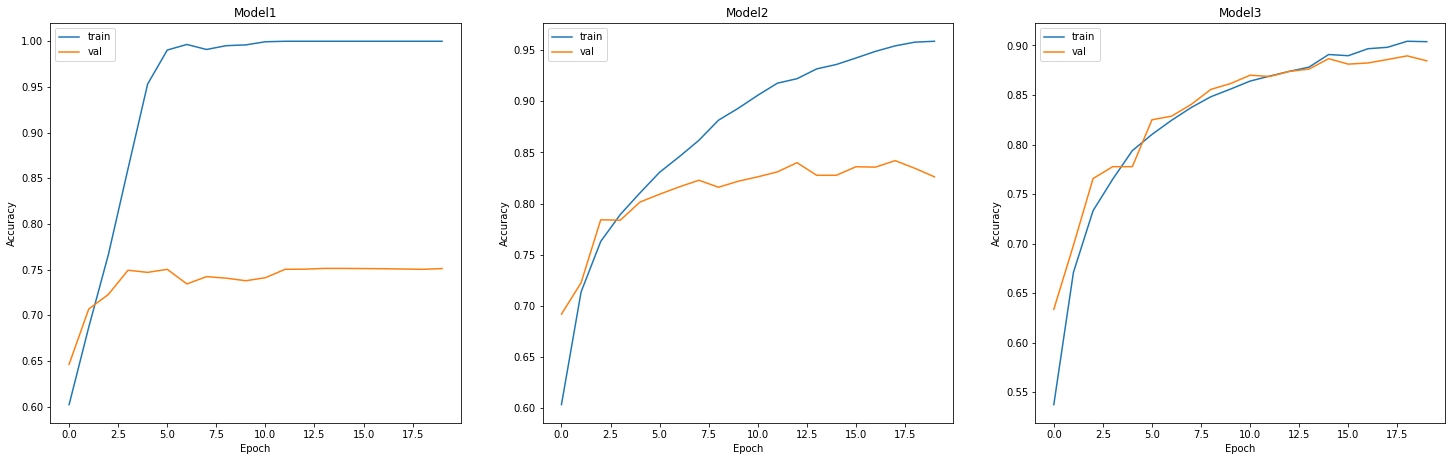

In [24]:
plotModel([m1, m2, m3])